# Goals

1. Inflation Rate and Interest Rate in the UK, 
2. Compare the US and UK interest rate and inflation filled in line charts
3. Static plot of the 2023 inflation rates worldwide

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import re

### Importing Data

Data Sources

1. [BoE Interest rate history source](https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp)
2. [Consumer Price Index History Annual rate source](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23)
3. [Gapminder](https://www.gapminder.org/data/)

In [47]:
# Inflation Rates from Gapminder

gapminder_data = pd.read_csv("data/gapminder_data/API_NY.GDP.DEFL.KD.ZG_DS2_en_csv_v2_5994713.csv", header=2)

g7_country_codes = ["USA", "GBR", "CAN", "FRA", "DEU", "ITA", "JPN"]

# Filtering for G7 countries
gapminder_data = gapminder_data.loc[gapminder_data["Country Code"].isin(g7_country_codes)]
gapminder_data.drop(["Unnamed: 67", "1960", "Indicator Code", "Indicator Name", "Country Code"], axis=1, inplace=True)
gapminder_data.set_index("Country Name", inplace=True)
gapminder_data = gapminder_data.T
gapminder_data["United Kingdom"]

1961    3.387796
1962    3.369205
1963    1.589148
1964    3.344812
1965    5.594549
          ...   
2018    1.737853
2019    2.113414
2020    5.933147
2021    0.016574
2022    5.410727
Name: United Kingdom, Length: 62, dtype: float64

In [72]:
# Interest Base Rates

uk_base_rates = pd.read_csv("data/CPIH_ANNUAL_RATE_00:ALL_ITEMS_2015=100.csv", header=7, names=["Year", "Rate"])

# Regex strings to match Year
r1 = "[0-9]{4}$"
r2 = "[0-9]{4}\s[Q]"
r3 = ".{8}"
uk_base_rates_yearly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r1)]
uk_base_rates_quarterly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r2)]
uk_base_rates_monthly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r3)]
uk_base_rates_monthly


,Year,Rate
173,1989 JAN,5.7
174,1989 FEB,5.8
175,1989 MAR,5.9
176,1989 APR,5.6
177,1989 MAY,5.9
...,...,...
585,2023 MAY,7.9
586,2023 JUN,7.3
587,2023 JUL,6.4
588,2023 AUG,6.3


### Exploring G7 Inflation rates

<Axes: title={'center': 'UK Base Rates per Year'}, xlabel='Year'>

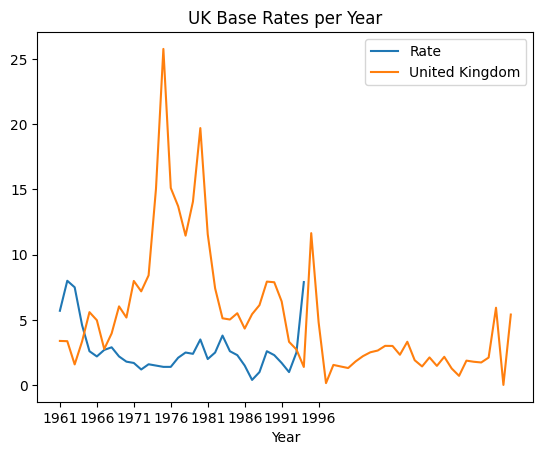

In [73]:
uk_base_rates_yearly.plot(x="Year", y="Rate", title="UK Base Rates per Year")
gapminder_data["United Kingdom"].plot(legend=True)
